# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | miracema do tocantins
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | al hamul
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | saint-francois
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of Set 1 | por

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,20.92,83,100,5.14,BR,1724615579
1,papatowai,-46.5619,169.4708,3.61,88,82,2.31,NZ,1724615581
2,miracema do tocantins,-9.5618,-48.3967,37.50,16,0,2.11,BR,1724615582
3,ushuaia,-54.8000,-68.3000,8.81,61,40,5.66,AR,1724615583
4,iqaluit,63.7506,-68.5145,7.85,75,100,1.54,CA,1724615584


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,20.92,83,100,5.14,BR,1724615579
1,papatowai,-46.5619,169.4708,3.61,88,82,2.31,NZ,1724615581
2,miracema do tocantins,-9.5618,-48.3967,37.50,16,0,2.11,BR,1724615582
3,ushuaia,-54.8000,-68.3000,8.81,61,40,5.66,AR,1724615583
4,iqaluit,63.7506,-68.5145,7.85,75,100,1.54,CA,1724615584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

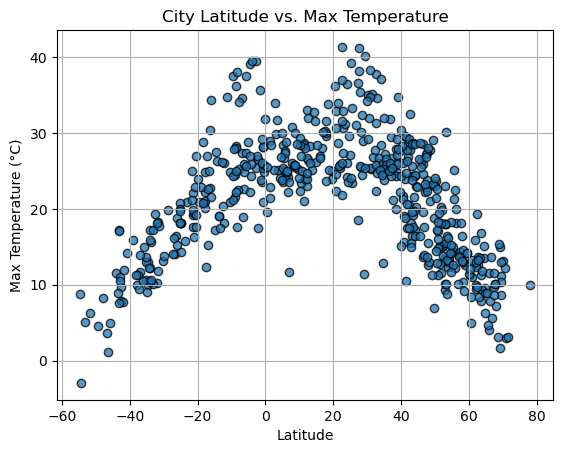

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

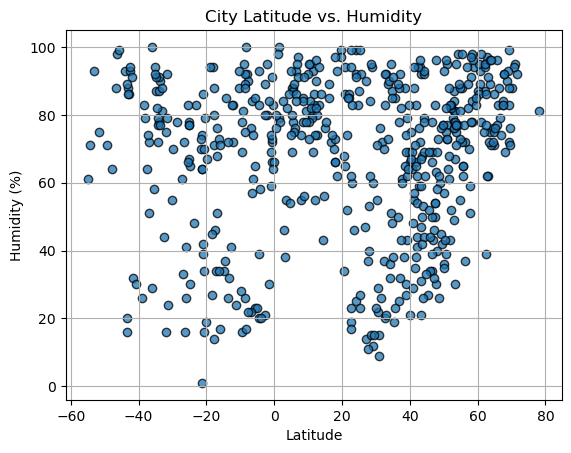

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

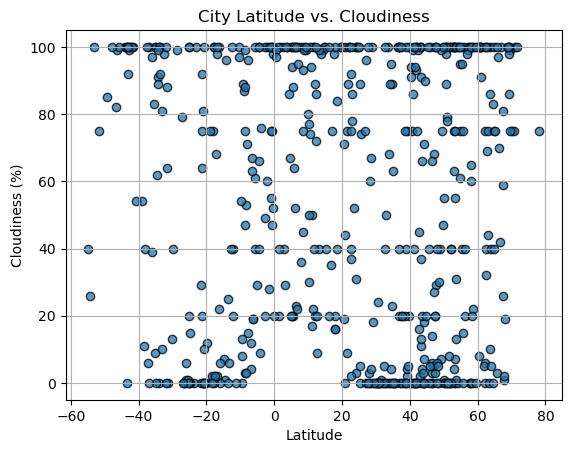

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

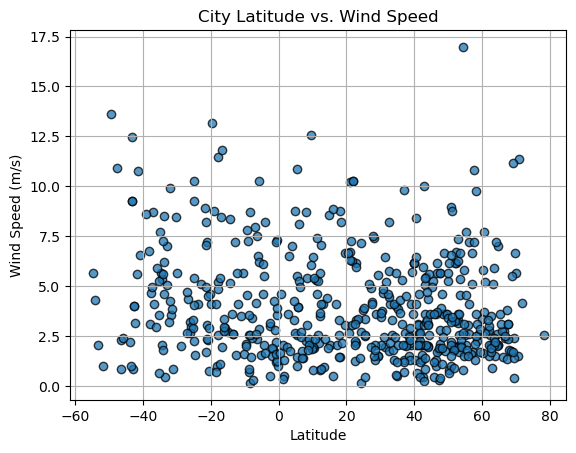

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, x_pos, y_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    



In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,iqaluit,63.7506,-68.5145,7.85,75,100,1.54,CA,1724615584
6,petropavlovsk-kamchatsky,53.0452,158.6483,9.33,81,0,2.00,RU,1724615587
8,ketchikan,55.3422,-131.6461,14.26,88,100,7.72,US,1724615589
9,rongelap,11.1635,166.8941,28.32,80,50,5.33,MH,1724615590
11,talnakh,69.4865,88.3972,11.11,76,99,2.44,RU,1724615523


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,20.92,83,100,5.14,BR,1724615579
1,papatowai,-46.5619,169.4708,3.61,88,82,2.31,NZ,1724615581
2,miracema do tocantins,-9.5618,-48.3967,37.50,16,0,2.11,BR,1724615582
3,ushuaia,-54.8000,-68.3000,8.81,61,40,5.66,AR,1724615583
5,port-aux-francais,-49.3500,70.2167,4.62,71,85,13.62,TF,1724615585


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4908162126577262


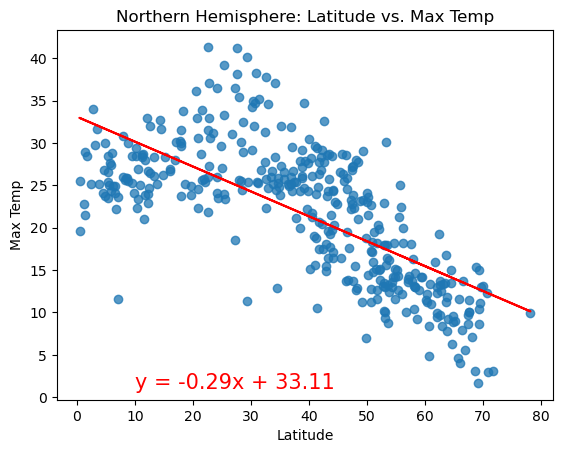

In [77]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = 10
y_pos = 1

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp");

The r^2-value is: 0.6993269497508177


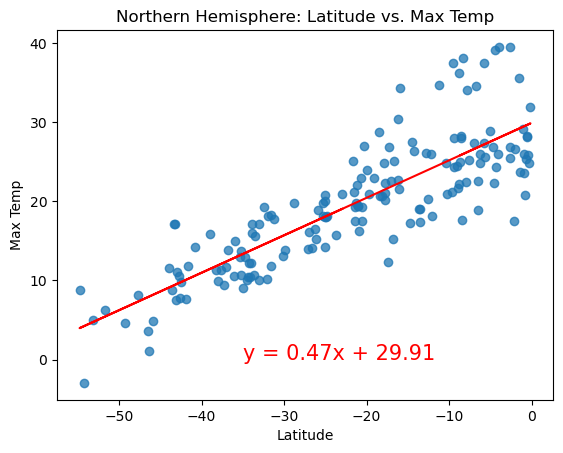

In [78]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = -35
y_pos = 0

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp");

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0016645857267041301


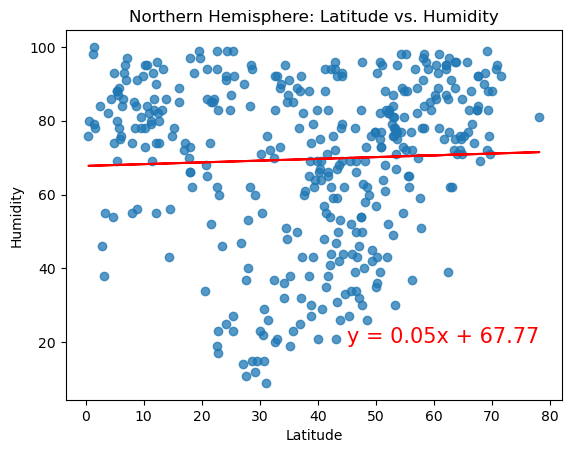

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = 45
y_pos = 20

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Latitude vs. Humidity");

The r^2-value is: 0.019635436718037583


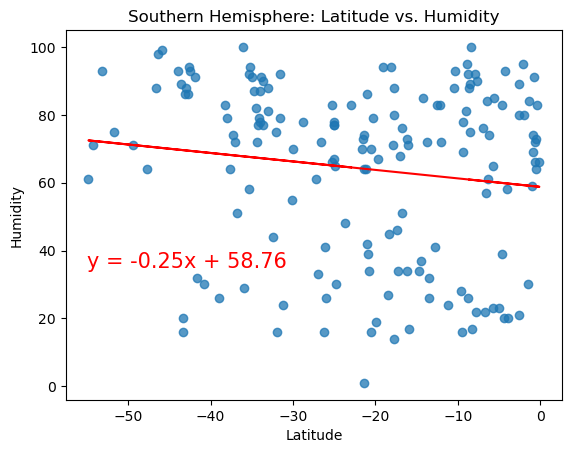

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = -55
y_pos = 35

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Latitude vs. Humidity");

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.003501977356564237


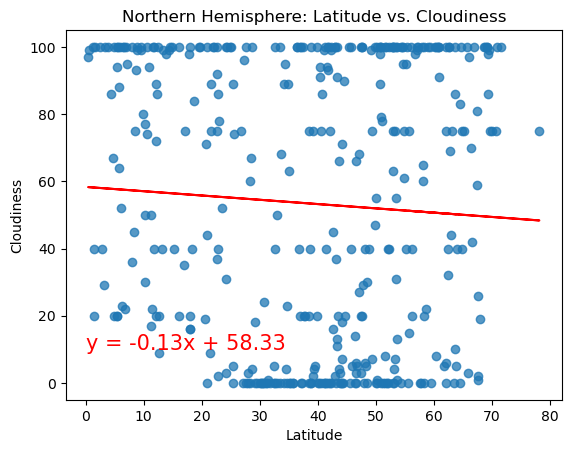

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = 0
y_pos = 10

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere: Latitude vs. Cloudiness");

The r^2-value is: 0.01910322529429541


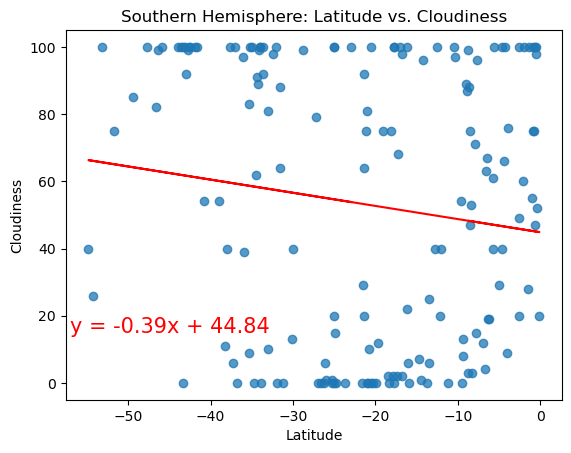

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = -57
y_pos = 15

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere: Latitude vs. Cloudiness");

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.003681244031331078


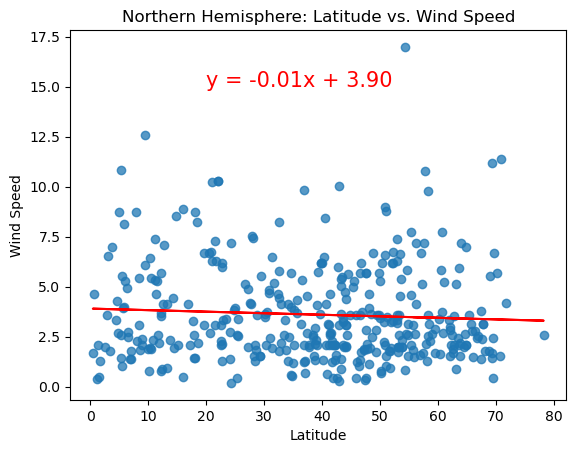

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = 20
y_pos = 15

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere: Latitude vs. Wind Speed");

The r^2-value is: 0.03788438670895702


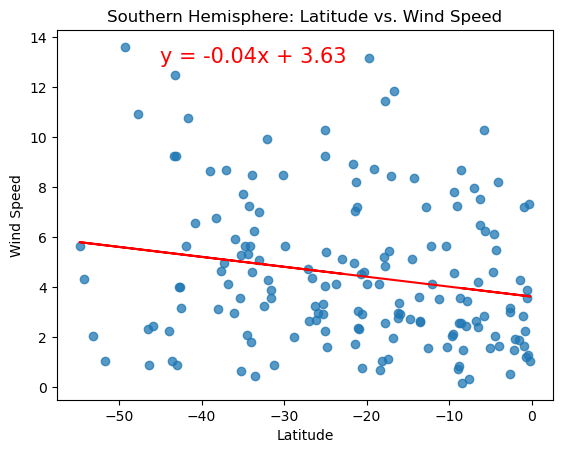

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")

x_pos = -45
y_pos = 13

equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_pos, y_pos, equation_text, fontsize=15, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed");

**Discussion about the linear relationship:** YOUR RESPONSE HERE